# Natural Language Processing
---------------------------------------------------

This example shows how to use ATOM to quickly go from raw text data to model predictions.

Import the 20 newsgroups text dataset from [sklearn.datasets](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html). The dataset comprises around 18000 articles on 20 topics. The goal is to predict the topic of every article.

## Load the data

In [1]:
import numpy as np
from atom import ATOMClassifier
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Use only a subset of the available topics for faster processing
X_text, y_text = fetch_20newsgroups(
    return_X_y=True,
    categories=[
        'alt.atheism',
        'sci.med',
        'comp.windows.x',
        'misc.forsale',
        'rec.autos',
    ],
    shuffle=True,
    random_state=1,
)
X_text = np.array(X_text).reshape(-1, 1)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X_text, y_text, test_size=0.3, verbose=2, warnings=False)

<< ================== ATOM ================== >>
Algorithm task: multiclass classification.

Dataset stats ==================== >>
Shape: (2846, 2)
Memory: 5.13 MB
Scaled: False
Categorical features: 1 (100.0%)
-------------------------------------
Train set size: 1993
Test set size: 853
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   480 (1.0) |   336 (1.0) |   144 (1.0) |
| 1 |   593 (1.2) |   415 (1.2) |   178 (1.2) |
| 2 |   585 (1.2) |   410 (1.2) |   175 (1.2) |
| 3 |   594 (1.2) |   416 (1.2) |   178 (1.2) |
| 4 |   594 (1.2) |   416 (1.2) |   178 (1.2) |



In [4]:
atom.dataset  # Note that the feature is automatically named 'corpus'

,corpus,target
0,From: cmd@cbnewsc.cb.att.com (craig.m.dinsmore...,2
1,From: mathew <mathew@mantis.co.uk>\nSubject: A...,0
2,From: Nigel@dataman.demon.co.uk (Nigel Ballard...,4
3,From: D.Haywood@sheffield-hallam.ac.UK (Dave H...,1
4,From: bil@okcforum.osrhe.edu (Bill Conner)\nSu...,0
...,...,...
2841,From: jim.zisfein@factory.com (Jim Zisfein) \n...,4
2842,From: darice@yoyo.cc.monash.edu.au (Fred Rice)...,0
2843,From: markm@bigfoot.sps.mot.com (Mark Monninge...,3
2844,From: geb@cs.pitt.edu (Gordon Banks)\nSubject:...,4


In [5]:
# Let's have a look at the first document
atom.corpus[0]

'From: cmd@cbnewsc.cb.att.com (craig.m.dinsmore)\nSubject: VCR, Cassette, Generator, tube tester, lawn spreader\nOrganization: AT&T\nDistribution: chi\nKeywords: forsale\nLines: 21\n\n\nFor Sale:\n\nVCR - Samsung VR2610 basic 2 head machine. It has a problem loading the tape,\notherwise it plays and records just fine, remote is missing. $25 or make offer.\n\nCassette deck - Pioneer CT-F900, three head, servo control, dolby. This was\nthe top of the line (or close to it) several years ago. The rewind doesn\'t\nwork well. All else is fine. Service & owners manual included. $45 or offer.\n\nGenerator - 120 VAC 2000-2500 watt, has a voltmeter w/duplex outlet, a 5 hp\nengine should drive it to full output. Manufactered by Master Mechanic in\nBurlington Wisconsin.  $50 or make an offer\n\nEICO Model 625 tube tester.   $20 or make offer\n\nLawn spreader - Scott "precision flow" model PF-1 drop type, excellent\ncondition, ideal for a smaller yard. $20 or make offer.\n\nCraig    days: 979-0059 

In [6]:
# Clean the documents from noise (emails, numbers, etc...)
atom.textclean()

Cleaning the corpus...
 --> Decoding unicode characters to ascii.
 --> Converting text to lower case.
 --> Dropping 10012 emails from 2830 documents.
 --> Dropping 0 URL links from 0 documents.
 --> Dropping 2214 HTML tags from 1304 documents.
 --> Dropping 2 emojis from 1 documents.
 --> Dropping 31222 numbers from 2843 documents.
 --> Dropping punctuation from the text.


In [7]:
# Have a look at the removed items
atom.drops

,email,url,html,emoji,number
0,[cmd@cbnewsc.cb.att.com],NaN,NaN,NaN,"[21, 2, 25, 45, 120, 2000, 2500, 5, 50, 625, 2..."
1,"[mathew@mantis.co.uk, 19930322114724@mantis.co...",NaN,"[<>, <>]",NaN,"[20, 1993, 10, 52, 14, 632, 5, 1993, 1, 4]"
2,"[nigel@dataman.demon.co.uk, nigel@dataman.demo...",NaN,NaN,NaN,"[1, 90, 1, 21, 34, 100015, 2644]"
3,"[d.haywood@sheffield-hallam.ac.uk, d.haywood@s...",NaN,NaN,NaN,"[10, 66, 10, 4, 1, 3, 23, 10, 54680, 44, 742, ..."
4,"[bil@okcforum.osrhe.edu, ssauyet@eagle.wesleya...",NaN,NaN,NaN,"[1, 1, 30]"
...,...,...,...,...,...
539,NaN,NaN,NaN,NaN,"[13, 93, 212, 274, 0646, 1097, 08836, 908, 563..."
780,NaN,NaN,NaN,NaN,"[47, 252, 4, 179, 34, 12]"
1217,NaN,NaN,NaN,NaN,"[223, 250, 10, 8, 8, 2002, 1600]"
1337,NaN,NaN,NaN,NaN,[17]


In [8]:
# Check how the first document changed
atom.corpus[0]

'from  craigmdinsmore\nsubject vcr cassette generator tube tester lawn spreader\norganization att\ndistribution chi\nkeywords forsale\nlines \n\n\nfor sale\n\nvcr  samsung vr60 basic 2 head machine it has a problem loading the tape\notherwise it plays and records just fine remote is missing  or make offer\n\ncassette deck  pioneer ctf900 three head servo control dolby this was\nthe top of the line or close to it several years ago the rewind doesnt\nwork well all else is fine service  owners manual included  or offer\n\ngenerator   vac  watt has a voltmeter wduplex outlet a  hp\nengine should drive it to full output manufactered by master mechanic in\nburlington wisconsin   or make an offer\n\neico model  tube tester    or make offer\n\nlawn spreader  scott precision flow model pf1 drop type excellent\ncondition ideal for a smaller yard  or make offer\n\ncraig    days   home \n\n'

In [9]:
# Convert the strings to a sequence of words
atom.tokenize()

Tokenizing the corpus...


In [10]:
# Print the first few words of the first document
atom.corpus[0][:7]

['from', 'craigmdinsmore', 'subject', 'vcr', 'cassette', 'generator', 'tube']

In [11]:
# Normalize the text to a predefined standard
atom.normalize(stopwords="english", lemmatize=True)

Normalizing the corpus...
 --> Dropping stopwords.
 --> Applying lemmatization.


In [12]:
atom.corpus[0][:7]  # Check changes...

['craigmdinsmore', 'subject', 'vcr', 'cassette', 'generator', 'tube', 'tester']

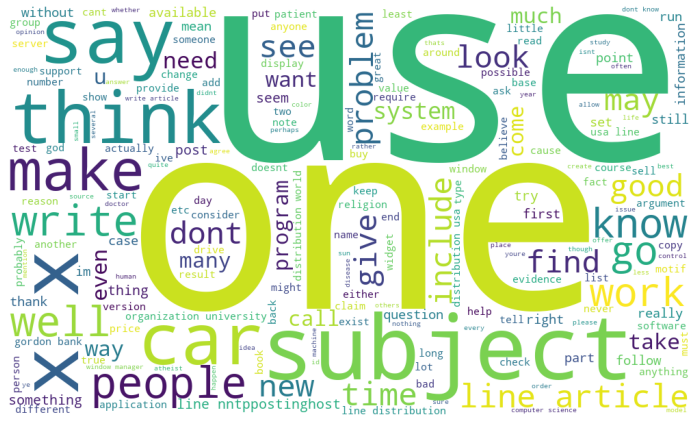

In [13]:
# Visualize the most common words with a wordcloud
atom.plot_wordcloud()

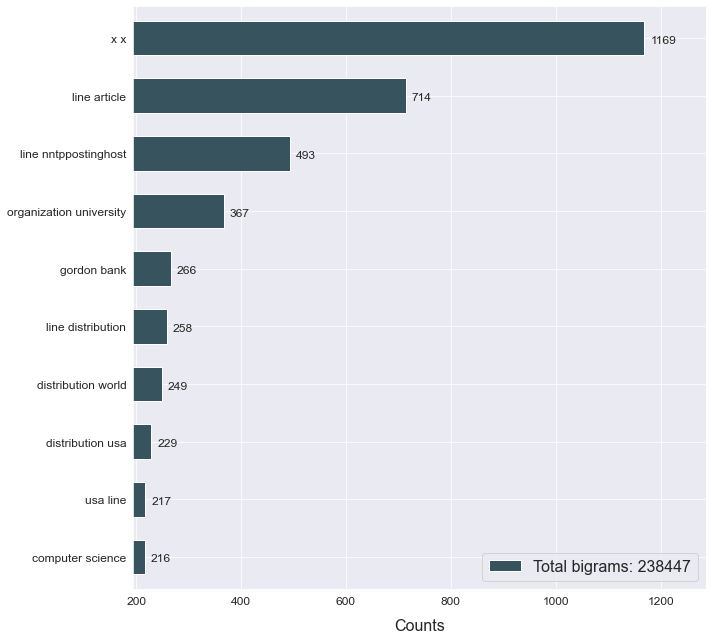

In [14]:
# Have a look at the most frequent bigrams
atom.plot_ngrams(2)

In [15]:
# Create the bigrams using the tokenizer
atom.tokenize(bigram_freq=215)

Tokenizing the corpus...
 --> Creating 10 bigrams on 4178 locations.


In [16]:
atom.bigrams

,bigram,frequency
0,x_x,1169
1,line_article,714
2,line_nntppostinghost,493
3,organization_university,367
4,gordon_bank,266
5,line_distribution,258
6,distribution_world,249
7,distribution_usa,229
8,usa_line,217
9,computer_science,216


In [17]:
# As a last step before modelling, convert the words to vectors
atom.vectorize(strategy="tfidf")

Fitting Vectorizer...
Vectorizing the corpus...


In [18]:
# The dimensionality of the dataset has increased a lot!
atom.shape

(2846, 28546)

In [19]:
# Note that the data is sparse and the columns are named
# after the words they are embedding
atom.dtypes

00          Sparse[float64, 0]
000         Sparse[float64, 0]
000000e5    Sparse[float64, 0]
00000ee5    Sparse[float64, 0]
000010af    Sparse[float64, 0]
                   ...        
zvonko      Sparse[float64, 0]
zx          Sparse[float64, 0]
zyklonb     Sparse[float64, 0]
zz          Sparse[float64, 0]
target_y                 int64
Length: 28546, dtype: object

In [20]:
# When the dataset is sparse, stats() shows the sparsity
atom.stats()

Dataset stats ==================== >>
Shape: (2846, 28546)
Memory: 3.10 MB
Sparse: True
Density: 0.32%
-------------------------------------
Train set size: 1993
Test set size: 853
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   480 (1.0) |   336 (1.0) |   144 (1.0) |
| 1 |   593 (1.2) |   415 (1.2) |   178 (1.2) |
| 2 |   585 (1.2) |   410 (1.2) |   175 (1.2) |
| 3 |   594 (1.2) |   416 (1.2) |   178 (1.2) |
| 4 |   594 (1.2) |   416 (1.2) |   178 (1.2) |


In [21]:
# Check which models have support for sparse matrices
atom.available_models()[["acronym", "fullname", "accepts_sparse"]]

,acronym,fullname,accepts_sparse
0,Dummy,Dummy Estimator,False
1,GP,Gaussian Process,False
2,GNB,Gaussian Naive Bayes,False
3,MNB,Multinomial Naive Bayes,True
4,BNB,Bernoulli Naive Bayes,True
5,CatNB,Categorical Naive Bayes,True
6,CNB,Complement Naive Bayes,True
7,Ridge,Ridge Estimator,True
8,Perc,Perceptron,False
9,LR,Logistic Regression,True


In [22]:
# Train the model
atom.run(models="MLP", metric="f1_weighted")


Training ========================= >>
Models: MLP
Metric: f1_weighted


Results for Multi-layer Perceptron:
Fit ---------------------------------------------
Train evaluation --> f1_weighted: 1.0
Test evaluation --> f1_weighted: 0.9708
Time elapsed: 1m:55s
-------------------------------------------------
Total time: 1m:55s


Final results ==================== >>
Duration: 1m:55s
-------------------------------------
Multi-layer Perceptron --> f1_weighted: 0.9708


## Analyze results

In [23]:
atom.evaluate()

,balanced_accuracy,f1_weighted,jaccard_weighted,matthews_corrcoef,precision_weighted,recall_weighted
MLP,0.971471,0.970771,0.943847,0.96332,0.970902,0.970692


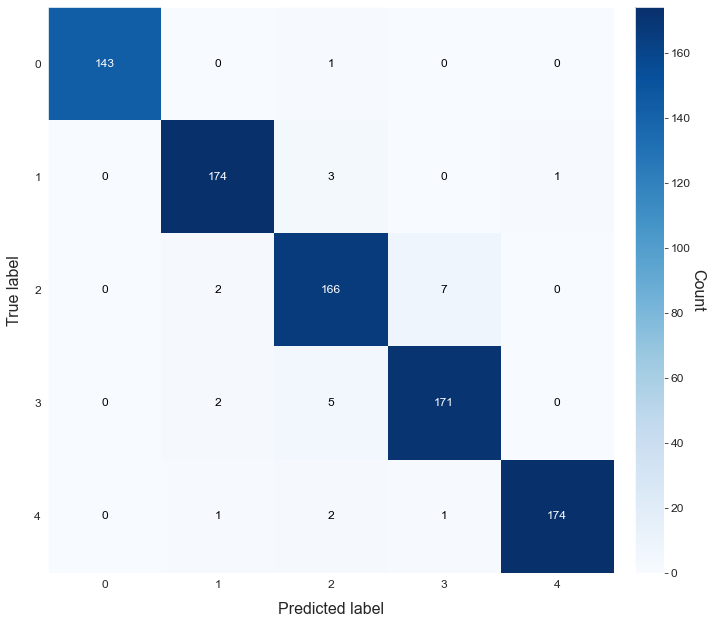

In [24]:
atom.plot_confusion_matrix(figsize=(10, 10))